In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("blackfriday.csv")
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(537577, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## Data Cleaning

In [5]:
## finding %age of null values in columns having null values

null = pd.DataFrame({'Null Values' : df.isnull().sum().sort_values(ascending=False),
                     'Percentage of Null Values' : 
                     (round(((df.isnull().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)),2)).astype(str)+"%"})
null[null['Null Values'] > 0]

,Null Values,Percentage of Null Values
Product_Category_3,373299,69.44%
Product_Category_2,166986,31.06%


In [6]:
## dropping Product_Category_3 as it has 

df = df.drop("Product_Category_3", axis = 1)
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200


In [7]:
## choice of a product mostly is impacted by age
## classifying mode values in Product Category 2 on the basis of age

mode = df.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)

## replacing null values in Product_Category_2 with 
## the mode value of most bought elements in its group as per age group

for age in df["Age"].unique():
    age_mode = df.loc[df['Age'] == age ,'Product_Category_2'].fillna(mode[age])
    df.loc[df['Age']== age,'Product_Category_2'] = age_mode

## checking no. of null values now
print(df['Product_Category_2'].isnull().sum())
print("---------------------------------")
df['Product_Category_2'].unique(),df['Product_Category_2'].dtype

0
---------------------------------


(array([ 4.,  6., 14.,  8.,  2., 15., 16., 11.,  5.,  3., 12.,  9., 10.,
        17., 13.,  7., 18.]),
 dtype('float64'))

In [8]:
## Mode values are all integer types
## Converting data type of Product_Cartegory_2 to integer

df['Product_Category_2'] = df['Product_Category_2'].astype(int)

### Univariate Analysis

In [9]:
## gathering essential details before visualization and analysis

print()
print("---------------Null Values---------------")
print()
print(df.isnull().sum())
print()
print("-------------------------------------------Description-------------------------------------------")
print()
df.describe()


---------------Null Values---------------

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

-------------------------------------------Description-------------------------------------------



,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.238368,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.332800,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,23961.000000


In [10]:
#Checking for duplicates
print('No. of duplicates in the dataset:',df.duplicated().sum())

No. of duplicates in the dataset: 0


#### Outliers in Target Column

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21968\2998725224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Purchase)


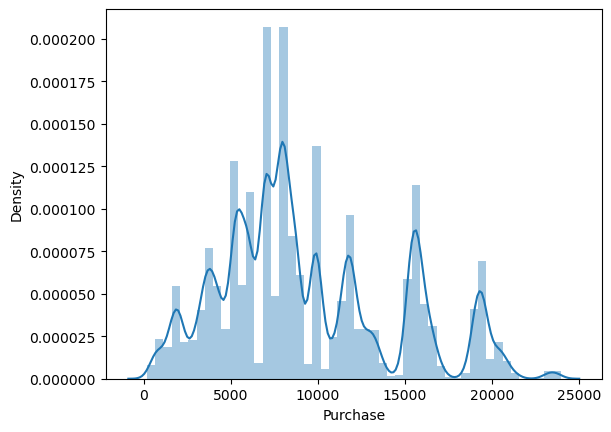

In [11]:
sns.distplot(df.Purchase)
plt.show()

### Percentile Method

In [12]:
## Checking if all Outliers fall in 1 to 99% range

data = df.copy()
min_limit = data['Purchase'].quantile(0.01)
max_limit = data['Purchase'].quantile(0.99)
count_bt = len(data)
data['Purchase'] = np.where(data['Purchase'] > max_limit, max_limit, np.where(data['Purchase'] < min_limit, min_limit, data['Purchase']))
count_at = len(data)
if count_at == count_bt:
    print("The values fall under 1 to 99% range, hence, outliers are not removed!")
else:
    print("Working on Outliers!")


The values fall under 1 to 99% range, hence, outliers are not removed!


## Data Analysis

### Univariate Analysis

#### Outliers in Target Column

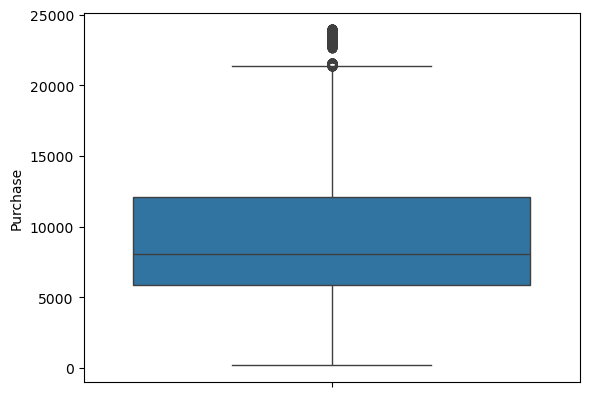

In [13]:
sns.boxplot(data = df, y = "Purchase")
plt.show()

###### Observation:
The outliers (Total Purchase Amount) contribute to the total sales and helps us to understand which customer or rather which category customers contributed the most to overall sales revenue.

Total no. of Users who purchased on Black Friday: 5891
Total no. of unique products that were sold on Black Friday: 3623


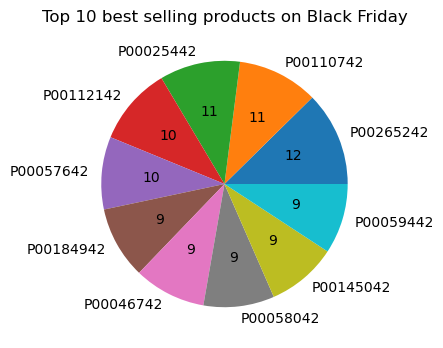

Product_ID
P00265242    1858
P00110742    1591
P00025442    1586
dtype: int64

In [14]:
## column (User_ID)

print("Total no. of Users who purchased on Black Friday:",df.User_ID.nunique())

## column (Product_ID)

print("Total no. of unique products that were sold on Black Friday:",df.Product_ID.nunique())
plt.figure(figsize=(10,4))
df.groupby("Product_ID").size().sort_values(ascending = False).head(10).plot(kind = "pie", autopct = "%.0f", title = "Top 10 best selling products on Black Friday")
plt.show()
df.groupby("Product_ID").size().sort_values(ascending = False).head(3)

###### Observations:
1. 5891 users purchased on Black Friday sales.
2. 3623 unique products were sold on Black Friday.
3. The top 3 best selling products (sold/unit) are: P00265242, P00110742, and P00025442.

<Figure size 640x480 with 0 Axes>

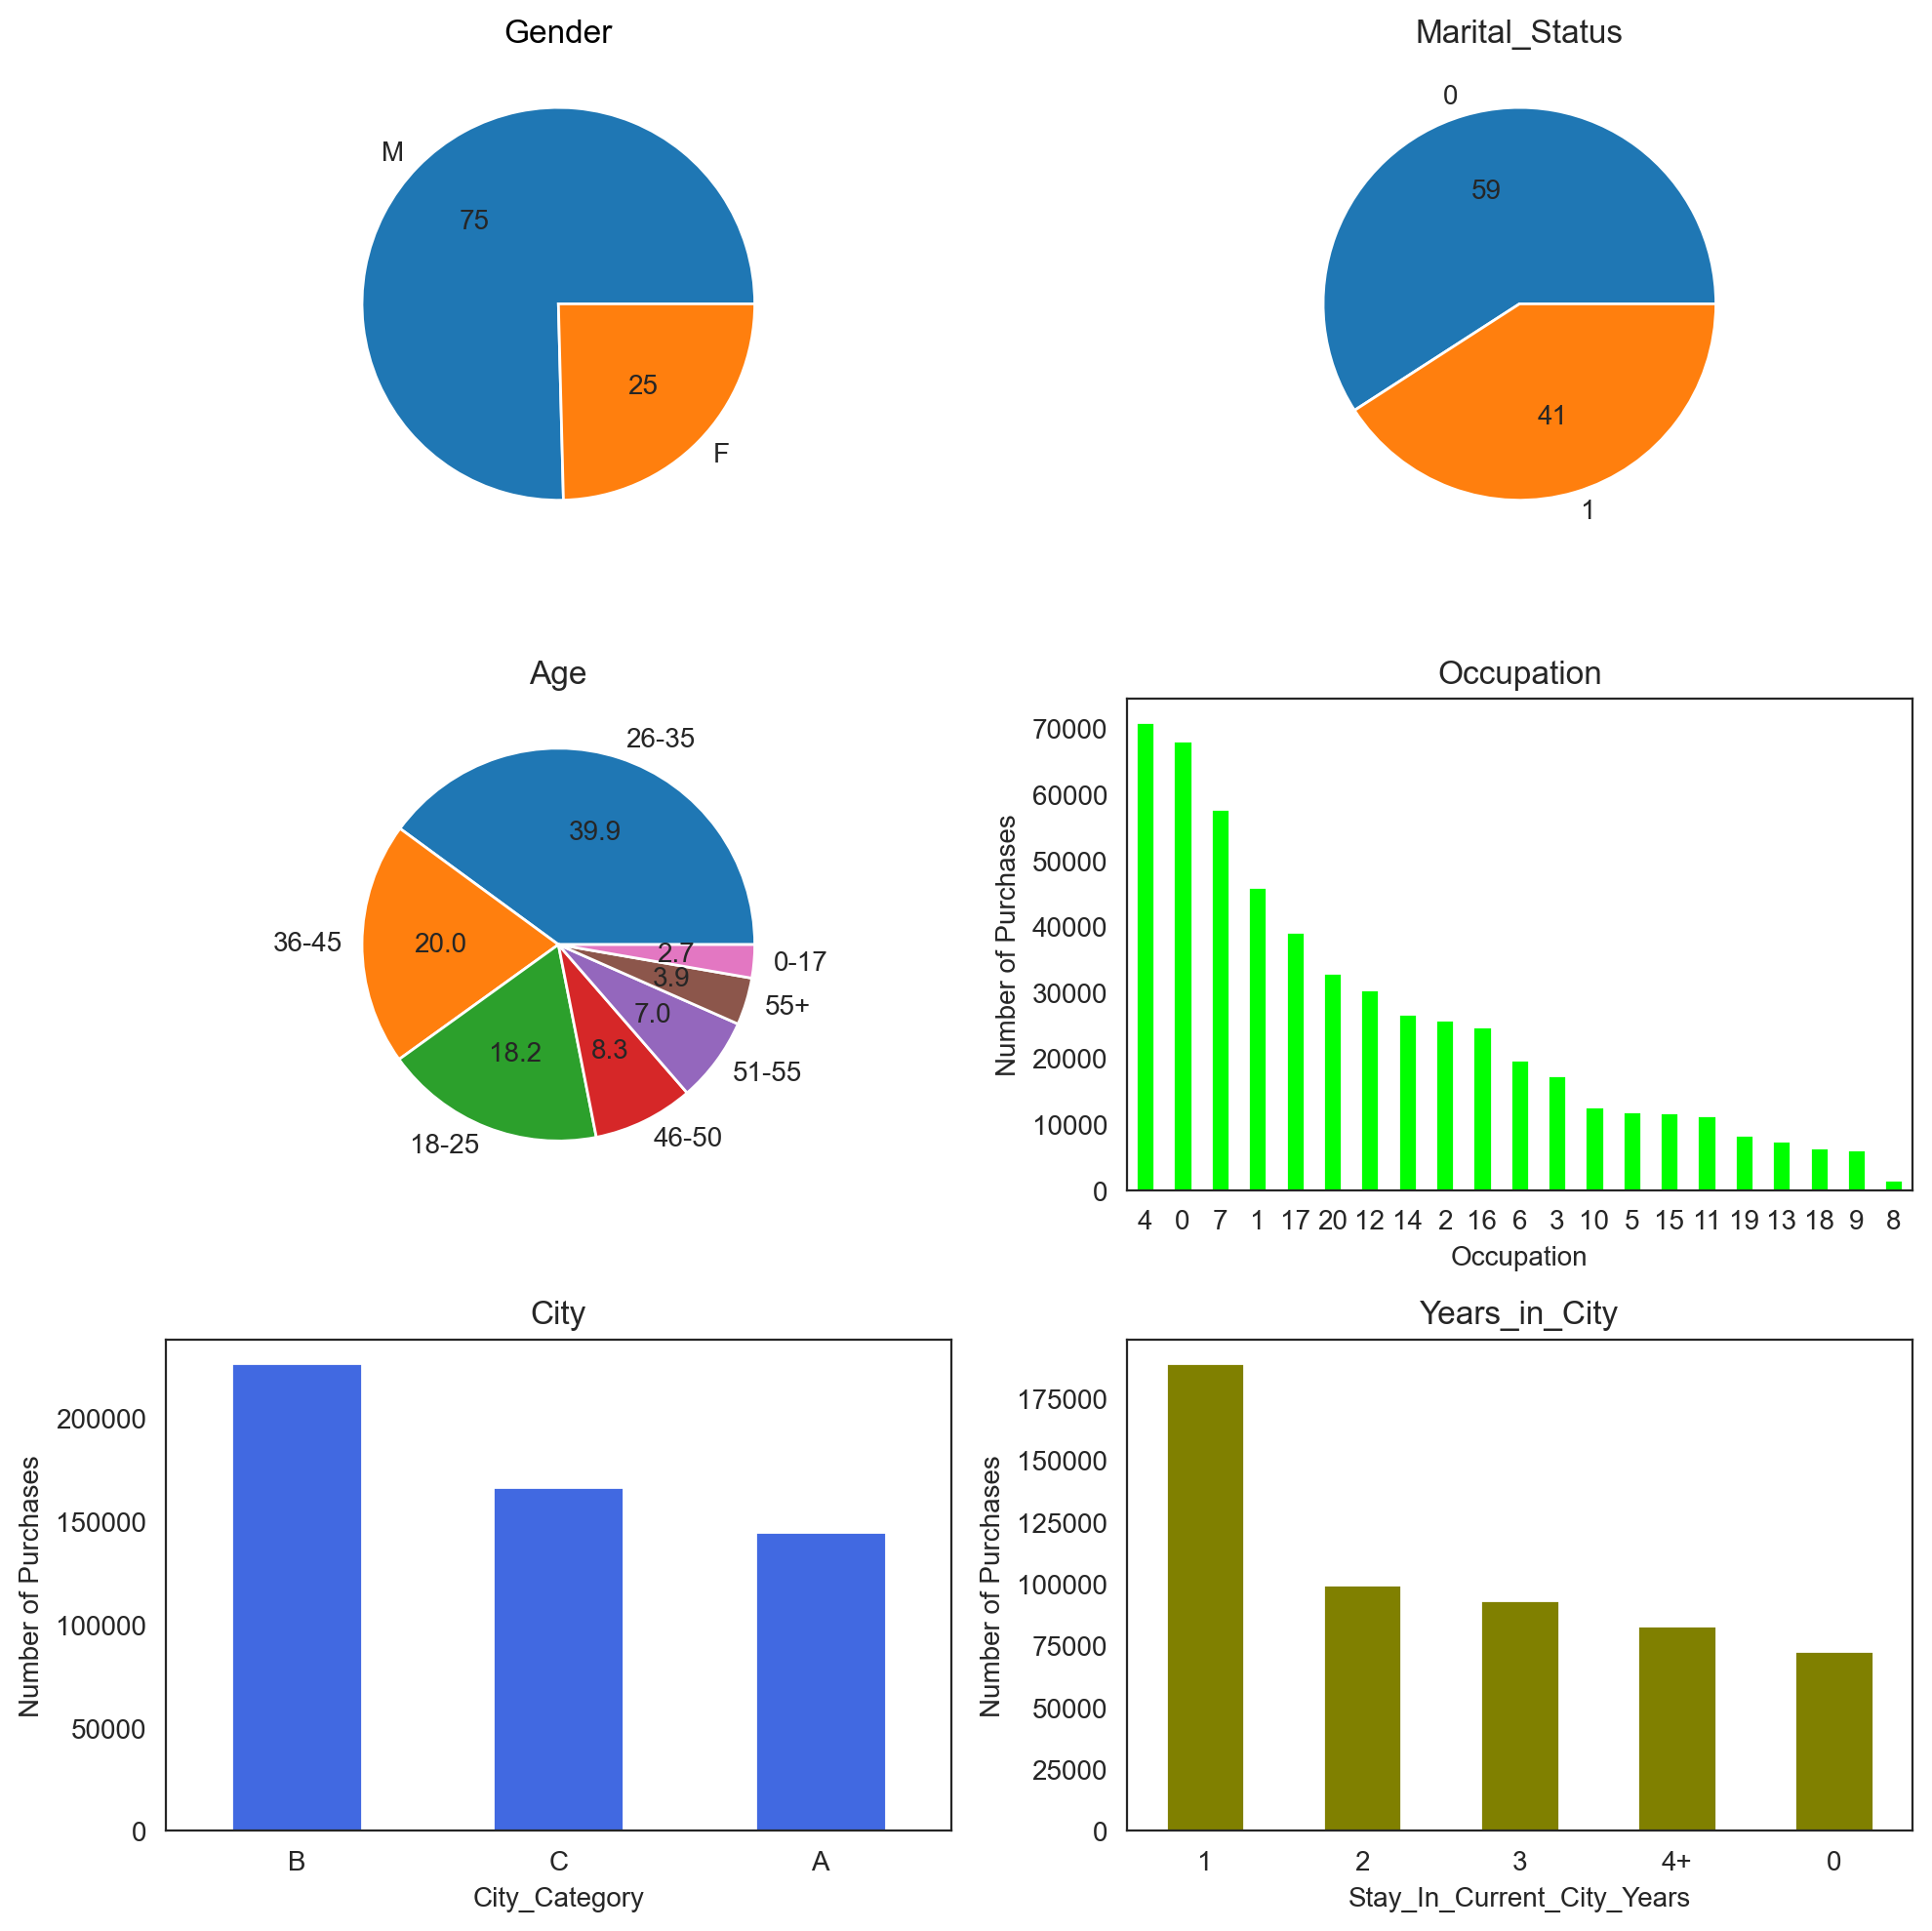

In [15]:
plt.figure(1)
plt.figure(figsize=(10,10), dpi = 200)

# Column (Gender)
plt.subplot(321)
sns.set_style(style = 'dark')
df['Gender'].value_counts().plot(kind='pie', autopct = '%.0f',label = "")
plt.title('Gender')

# Column (Marital_Status)
plt.subplot(322)
sns.set_style(style = 'white')
df['Marital_Status'].value_counts().plot(kind='pie', autopct = '%.0f',label = "")
plt.title('Marital_Status')

# Column (Age)
plt.subplot(323)
df['Age'].value_counts().plot(kind='pie', autopct = '%.1f', label = "")
plt.title('Age')

# Column (Occupation)
plt.subplot(324)
df['Occupation'].value_counts().plot(kind='bar',color='lime',rot=0)
plt.title('Occupation')
plt.ylabel("Number of Purchases")

# Column (City)
plt.subplot(325)
df['City_Category'].value_counts().plot(kind='bar',color='royalblue',rot=0)
plt.title('City')
plt.ylabel("Number of Purchases")

# Column (Years_in_City)
plt.subplot(326)
df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',color='olive',rot=0)
plt.title('Years_in_City')
plt.ylabel("Number of Purchases")

plt.tight_layout()
plt.show()

###### Observations:
1. The Male : Female ratio of customers (on basis of no. of units sold/ purchased) on Black Friday is 75:25 or 3:1.
2. Out of the total no. of items sold, about 59% of it were sold to customers who were single/ unmarried while 41% were married.
3. Age group of 26-35 purchased the most number of items on Black Friday.
4. People who falls in the Occupation Category '4' purchased the most number of items.
5. People in City B purchased the most number of items on Black Friday.
6. People staying in the same city for 1 year purchased the most number of items on Black Friday.

### Bivariate Analysis

##### Analysis from User_ID

In [16]:
## Users on the basis of purchase

print("Most number of products bought by any user:",int(df.groupby("User_ID")["Product_ID"].nunique().sort_values(ascending = False).head(1)))
print("Highest Order Value by a single individual:",int(df.groupby("User_ID")["Purchase"].sum().sort_values(ascending = False).head(1)))
print("Average Order Value by a single individual:",int(df.groupby("User_ID")["Purchase"].mean().sort_values(ascending = False).head(1)))

Most number of products bought by any user: 1025
Highest Order Value by a single individual: 10536783
Average Order Value by a single individual: 19278


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21968\3755747207.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Most number of products bought by any user:",int(df.groupby("User_ID")["Product_ID"].nunique().sort_values(ascending = False).head(1)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21968\3755747207.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Highest Order Value by a single individual:",int(df.groupby("User_ID")["Purchase"].sum().sort_values(ascending = False).head(1)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21968\3755747207.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Average Order Value by a single individual:",int(df.groupby("User_ID")["Purchase"].mea

###### Observations:
1. Most number of products bought by any user is 1025.
2. Highest Order Value by a single individual is 10,536,783.
3. Average Order Value by a single individual is 19,278.


##### Analysis from Product_ID



-------------------------------------------------- Based on Gender and Marital Status --------------------------------------------------




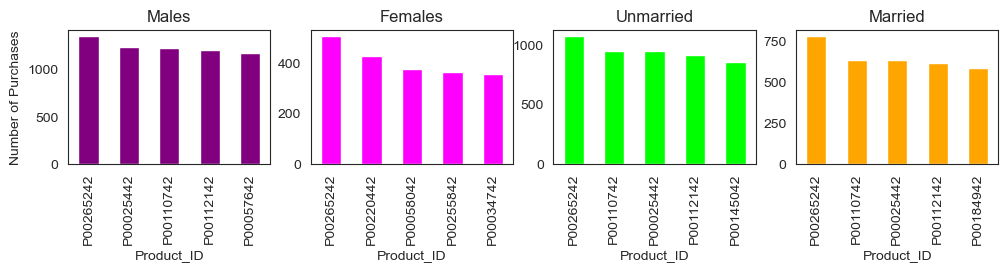



------------------------------------------------- Based on Age Groups and Occupation -------------------------------------------------




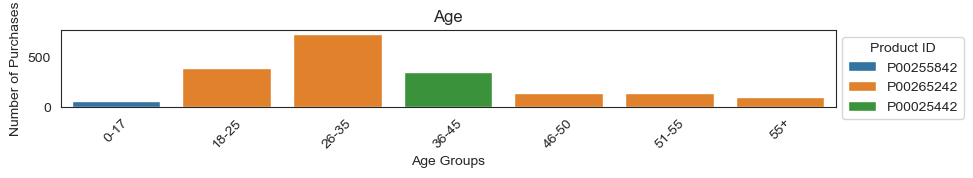

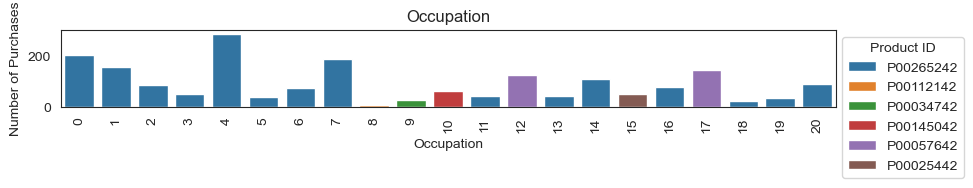



---------------------------------------------------------- Based on City Type and Years in the City ----------------------------------------------------




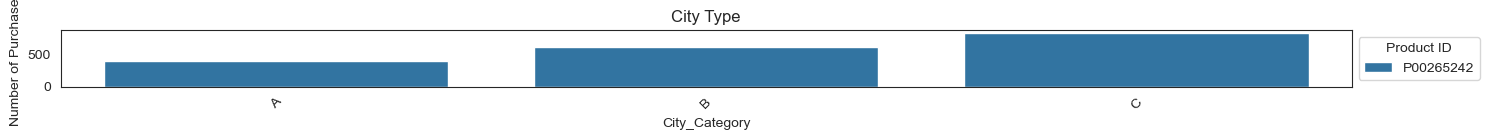

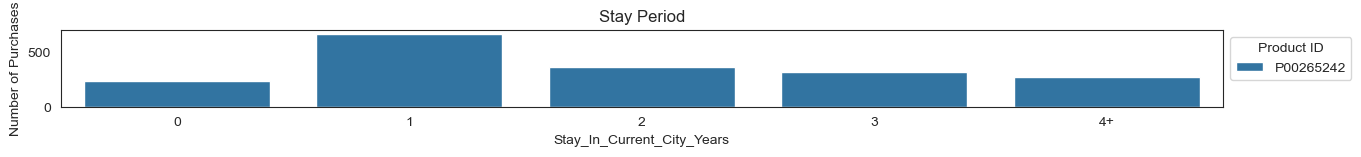



----------------------------------------------------------------------------- Based on Revenue ---------------------------------------------------------




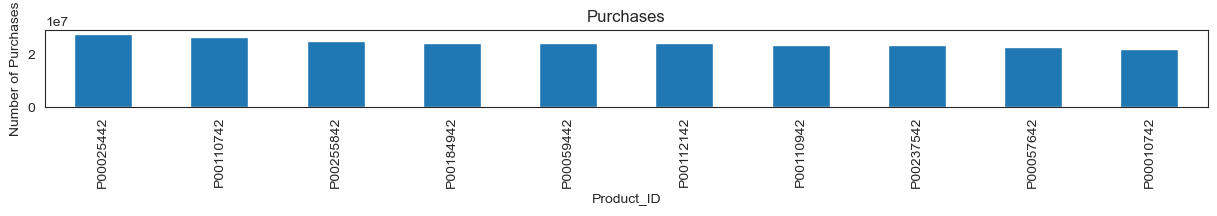

In [17]:
## top purchased products in each category


## columns 2 & 7

print("\n")
print("-------------------------------------------------- Based on Gender and Marital Status --------------------------------------------------")
print("\n")
plt.figure(1,figsize = (12,8))
plt.tight_layout()

## top preferred products by males and females

plt.subplot(441)
male = df[df.Gender == "M"]
male.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'purple', title = "Males")
plt.ylabel("Number of Purchases")

plt.subplot(442)
female = df[df.Gender == "F"]
female.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'magenta', title = "Females")

## top preferred products by Married and Unmarried People

plt.subplot(443)
unmarried = df[df.Marital_Status == 0]
unmarried.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'lime', title = "Unmarried")

plt.subplot(444)
married = df[df.Marital_Status == 1]
married.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'orange', title = "Married")

plt.show()

## columns 3 & 4

print("\n")
print("------------------------------------------------- Based on Age Groups and Occupation -------------------------------------------------")
print("\n")

## top preferred products by groups of different ages

plt.figure(2,figsize = (10,1), dpi = 100)
product_counts = df.groupby(['Age', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each age

most_frequent_products = product_counts.loc[product_counts.groupby('Age')['Count'].idxmax()]

# Plotting
sns.barplot(x='Age', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('Age')
plt.xlabel('Age Groups')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## top preferred products by groups of different Occupations

plt.figure(3,figsize = (10,1), dpi = 100)
product_counts = df.groupby(['Occupation', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each occupation

most_frequent_products = product_counts.loc[product_counts.groupby('Occupation')['Count'].idxmax()]

# Plotting

sns.barplot(x='Occupation', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('Occupation')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

## columns 5 & 6

print("\n")
print("---------------------------------------------------------- Based on City Type and Years in the City ----------------------------------------------------")
print("\n")

## top preferred products by groups of different city types

plt.figure(4,figsize = (15,1.5), dpi = 100)
product_counts = df.groupby(['City_Category', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each city category

most_frequent_products = product_counts.loc[product_counts.groupby('City_Category')['Count'].idxmax()]

# Plotting
sns.barplot(x='City_Category', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('City Type')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## top preferred products by groups of different stay period

plt.figure(5,figsize = (15,1), dpi = 100)
product_counts = df.groupby(['Stay_In_Current_City_Years', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each stay period

most_frequent_products = product_counts.loc[product_counts.groupby('Stay_In_Current_City_Years')['Count'].idxmax()]

# Plotting
sns.barplot(x='Stay_In_Current_City_Years', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('Stay Period')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## column 10

print("\n")
print("----------------------------------------------------------------------------- Based on Revenue ---------------------------------------------------------")
print("\n")

## top revenue earning products

plt.figure(6,figsize = (15,1), dpi = 100)
df.groupby("Product_ID")["Purchase"].sum().sort_values(ascending = False).head(10).plot(kind = "bar",title = "Purchases")
plt.ylabel("Number of Purchases")
plt.show()

###### Observations:
1. The most liked/ purchased product by Males, Females, Unmarried, and Married people on Black Friday was 'P00265242'.
2. 'P00265242' was also the most preferred purhase of age groups - '18-25', '26-35', '46-50', '51-55', and '55+'.
3. 'P00025442' was the most preferred product in age group '36-45' and 'P00255842' was the most preferred product in age group '0-17'.
4. 'P00265242' was the most preferred purchase of Occupation groups - '0', '1', '2', '3', '4', '5', '6', '7', '11', '13', '14', '16', '18', '19', and '20'.
5. 'P00057642' was the most preferred purchase of Occupation groups - '12', and '17.
6. 'P00112142' was the most preferred purchase of Occupation group - '8'.
7. 'P00034742' was the most preferred purchase of Occupation group - '9'.
8. 'P00145042' was the most preferred purchase of Occupation group - '10'.
9. 'P00025442' was the most preferred purchase of Occupation group - '15'.
10. 'P00265242' was the most preferred purchase of all the City Groups, that is, 'A', 'B', and 'C', and was purchased the most in Tier 'C'.
11. 'P00265242' was the most preferred purchase of people staying in the city for any number of years.
12. The most revenue came from 'P00025442', followed by 'P00110742', and 'P00255842'.

##### Analysing Product Categories

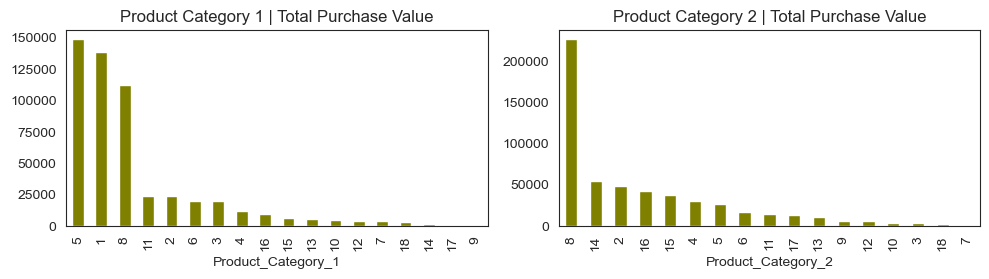

In [18]:
## plotting products vs purchase rate

plt.figure(1,figsize=(10,5))

plt.subplot(221)
df['Product_Category_1'].value_counts().plot(kind='bar',color='olive',rot=0)
plt.xticks(rotation=90)
plt.title('Product Category 1 | Total Purchase Value')

plt.subplot(222)
df['Product_Category_2'].value_counts().plot(kind='bar',color='olive',rot=0)
plt.xticks(rotation=90)
plt.title('Product Category 2 | Total Purchase Value')

plt.tight_layout()
plt.show()

###### Observations:
1. Product 5, 1 and 8 (in the descending order) were the most promising products from Product Category 1 on Black Friday.
2. Product 8, 14 and 2 (in the descending order) were the most promising products from Product Category 2 on Black Friday.

#### Analysis per User

In [19]:
## creating a new data frame consisting of no duplicates

## Aggregate data to get total purchase value and number of products purchased for each user

user_purchase = df.groupby('User_ID').agg({
    'Purchase': 'sum',  # Sum of purchase values
    'Product_ID': 'nunique'  # Number of unique products purchased
}).reset_index()

## Get unique user and their gender information

user_info = df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']].drop_duplicates()

## Merge the aggregated purchase data with user information

df_user = pd.merge(user_info, user_purchase, on = 'User_ID')

## Rename the columns for clarity

df_user.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
                        'Total_Purchase', 'Num_Products']

## Display the new dataframe

df_user.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase,Num_Products
0,1000001,F,0-17,10,A,2,0,333481,34
1,1000002,M,55+,16,C,4+,0,810353,76
2,1000003,M,26-35,15,A,3,0,341635,29
3,1000004,M,46-50,7,B,2,1,205987,13
4,1000005,M,26-35,20,A,1,1,821001,106


##### Gender

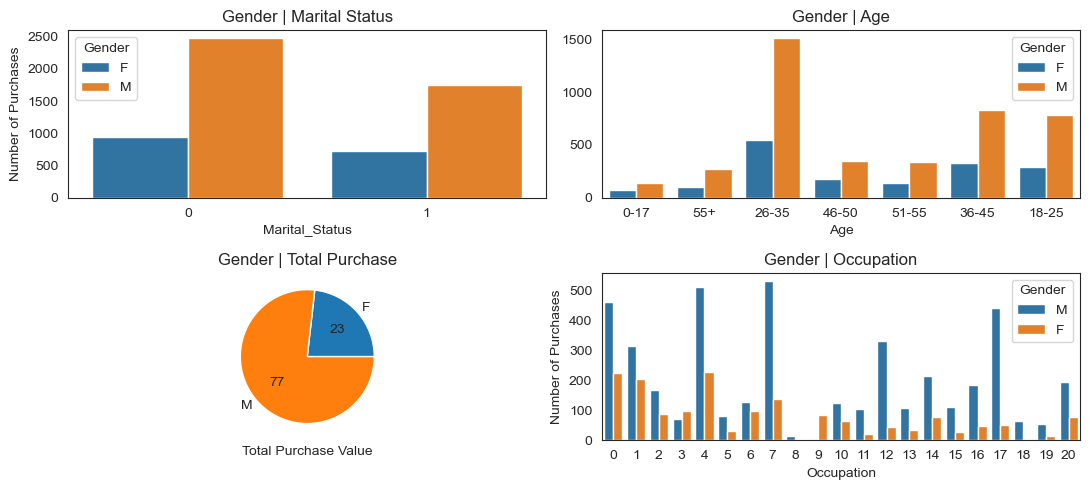

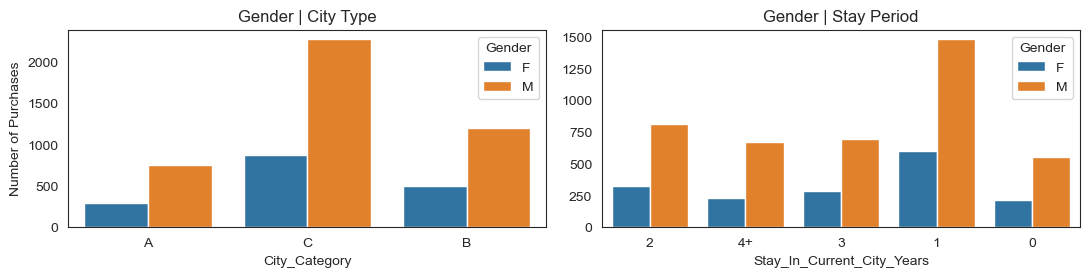

In [20]:
## column Gender with Marital Status, Age, Total purchase value, Occupation, City Type and Stay Period Categories

plt.figure(1,figsize = (11,5))

## Gender with Marital Status

plt.subplot(221)
sns.countplot(data = df_user, x = "Marital_Status", hue = "Gender")
plt.title("Gender | Marital Status")
plt.ylabel("Number of Purchases")

## Gender with Age

plt.subplot(222)
sns.countplot(data = df_user, x = "Age", hue = "Gender")
plt.title("Gender | Age")
plt.ylabel("")

## Gender with Total Purchase Value

plt.subplot(223)
df_user.groupby("Gender")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Gender | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

## Gender with Occupation

plt.subplot(224)
sns.countplot(data = df_user, x = "Occupation", hue = "Gender")
plt.ylabel("Number of Purchases")
plt.title("Gender | Occupation")

plt.tight_layout()
plt.show()

plt.figure(2,figsize = (11,5))

## Gender with City Type

plt.subplot(221)
sns.countplot(data = df_user, x = "City_Category", hue = "Gender")
plt.ylabel("Number of Purchases")
plt.title("Gender | City Type")

## Gender with Stay Period

plt.subplot(222)
sns.countplot(data = df_user, x = "Stay_In_Current_City_Years", hue = "Gender")
plt.ylabel("")
plt.title("Gender | Stay Period")

plt.tight_layout()
plt.show()

###### Observations:
1. Unmarried Males have purchased the most no. of items followed by Married Males, followed by Unmarried Women, followed by Married Women.
2. Among both males and females, '26-35' age group have purchased the most number of items, followed by '36-45', '18-25',  '46-50', '51-55', '55+', and '0-17' in the descending order.
3. The Total Purchase Value between Male : Female is 77:23.
4. Males in the Occupation Categories '7', '4', '0', '17', and '12' were the highest buyers on Black Friday (Ranked from highest towards lowest).
5. Females in the Occupation Categories '4', '0', '1', '7', and '6' were the highest buyers on Black Friday (Ranked from highest towards lowest).
6. Both Males and Females in City Type C bought more products followed by City Type B, and then City Type A.
7. Both Males and Females staying in their present city for 1 year purchased more goods on Black Friday followed by people staying 2 years, 3 years, 4+ years and then people staying in the city for less than a year.

In [21]:
## mean consuming by gender for each age group

pd.pivot_table(data=df_user, index='Age', values='Total_Purchase', columns=['Gender'], aggfunc='mean', margins=True,
               margins_name='Mean_Value').style.background_gradient(cmap='Set3',axis=None, vmin=7999, vmax=9999)

Gender,F,M,Mean_Value
Age,,,
0-17,536238.653846,648802.792857,608527.550459
18-25,704562.543554,894449.910486,843469.859682
26-35,796069.137615,1038389.539788,974061.912323
36-45,717749.189189,925226.720624,866023.620394
46-50,630752.708791,855648.223496,778565.391714
51-55,619523.992958,808070.646018,752408.224532
55+,454044.404040,559210.424908,531222.693548
Mean_Value,699054.034214,911963.161420,851751.549482


###### Observation:
The average purchase size for Females = "699054.03" while for Males = "911963.16"

##### Age

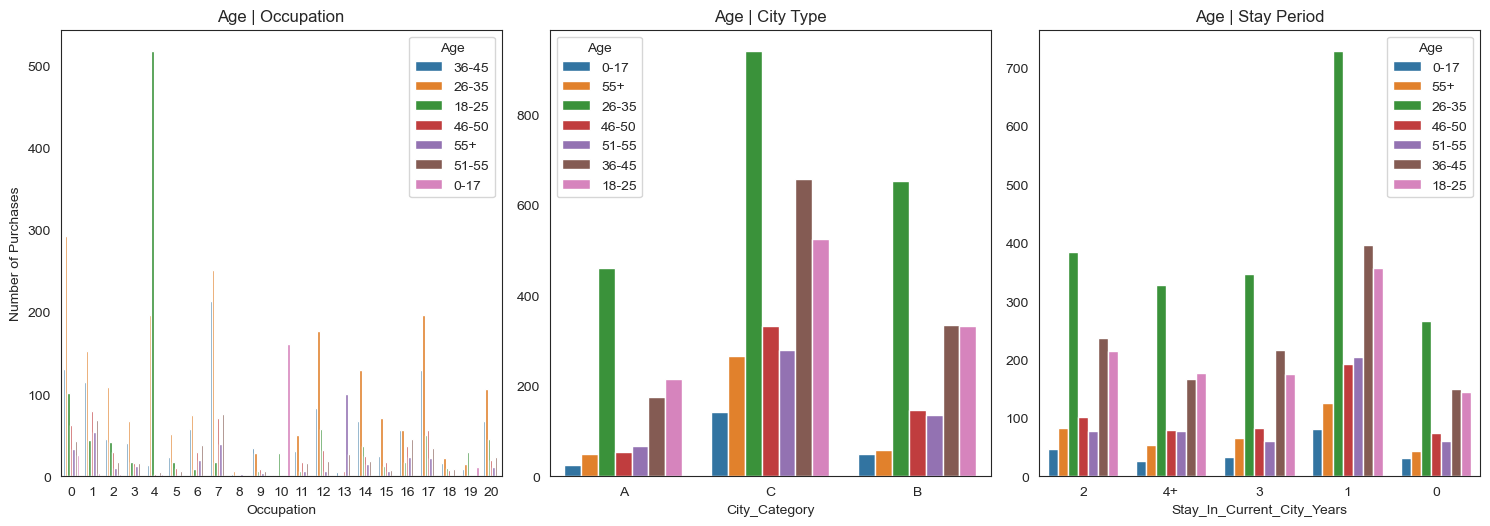

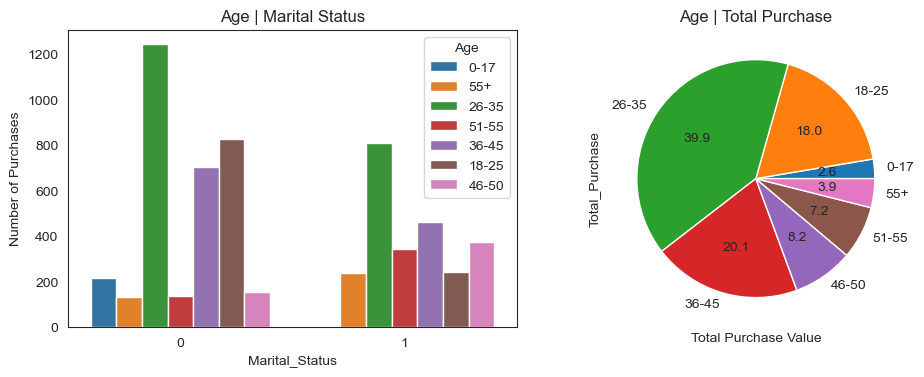

In [22]:
## column Age with Marital Status, Occupation, City Type, Stay Period, and Total purchase value

plt.figure(1,figsize = (15,15))

## Age with Occupation

plt.subplot(331)
sns.countplot(data = df_user, x = "Occupation", hue = "Age")
plt.ylabel("Number of Purchases")
plt.title("Age | Occupation")

## Age with City Type

plt.subplot(332)
sns.countplot(data = df_user, x = "City_Category", hue = "Age")
plt.ylabel("")
plt.title("Age | City Type")

## Age with Stay Period

plt.subplot(333)
sns.countplot(data = df_user, x = "Stay_In_Current_City_Years", hue = "Age")
plt.ylabel("")
plt.title("Age | Stay Period")

plt.tight_layout()
plt.show()

plt.figure(2,figsize = (10,7))

## Age with Marital Status

plt.subplot(221)
sns.countplot(data = df_user, x = "Marital_Status", hue = "Age")
plt.ylabel("Number of Purchases")
plt.title("Age | Marital Status")

## Age with Total Purchase Value

plt.subplot(222)
df_user.groupby("Age")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Age | Number of Products")
plt.title("Age | Total Purchase")
plt.xlabel("Total Purchase Value")

plt.tight_layout()
plt.show()

###### Observations:
1. Most of the purchasing Occupation from different age groups on Black Friday are as follows:
    - <b>0-17  :</b> Occupation Category '<b>10</b>'.
    - <b>18-25:</b> Occupation Category '<b>4</b>'.
    - <b>26-35:</b> Occupation Category '<b>0</b>'.
    - <b>36-45:</b> Occupation Category '<b>7</b>'.
    - <b>46-50:</b> Occupation Category '<b>1</b>'.
    - <b>51-55:</b> Occupation Category '<b>7</b>'.
    - <b>55+   :</b> Occupation Category '<b>13</b>'.
2. '36-45' age group purchases less than age group '18-25' in City Type 'A' but it is opposite in City Type 'B', and City Type 'C'.
3. Same anomaly is observed between age groups '46-50' and '51-55'.
4. Age groups '18-25' and '51-55' shows anomaly in purchase history on Black Friday from the rest with 4+ years staying residents buying more than 3 years residents.
5. Married People in the age groups '46-50' and '51-55' purchased more on Black Friday than their unmarried counterparts, opposite to the normal.
6. The Total Purchase Order value shows similar trend to Number of units bought for all age groups.

##### Occupation

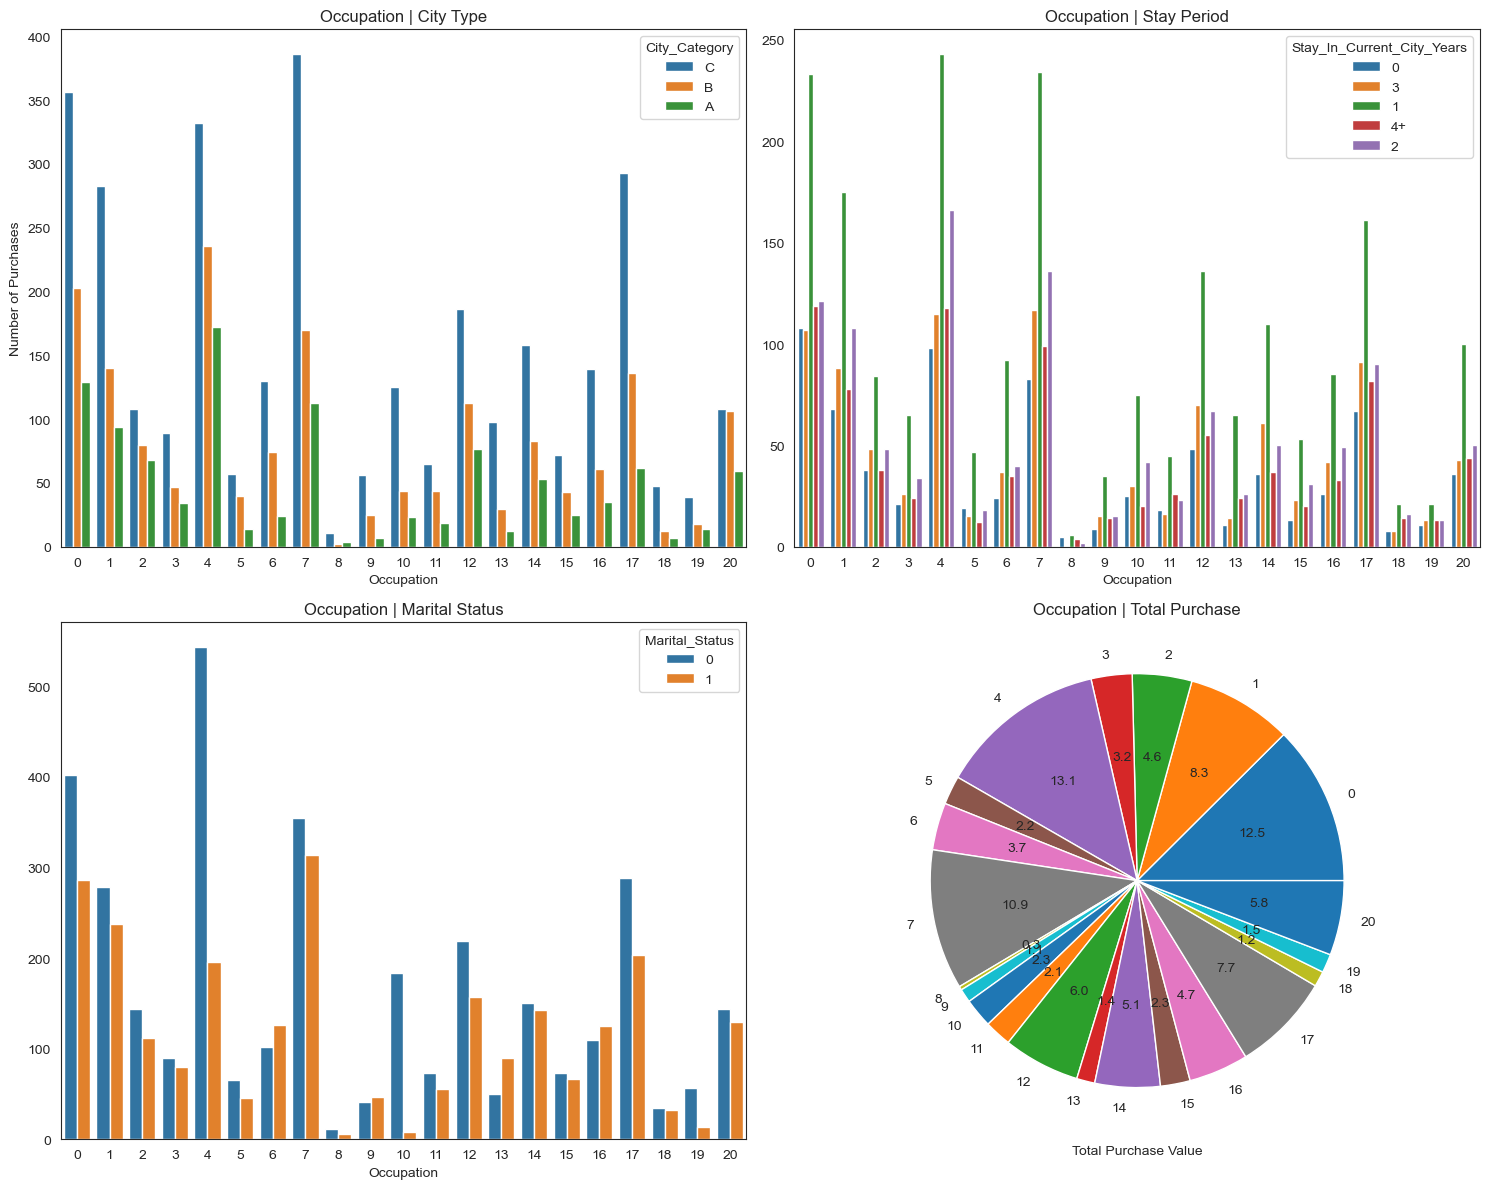

In [23]:
## column Occupation with Marital Status, City Type, Stay Period, Number of units purchased, and Total purchase value

plt.figure(1,figsize = (15,12))

## Occupation with City Type

plt.subplot(221)
sns.countplot(data = df_user, hue = "City_Category", x = "Occupation")
plt.ylabel("Number of Purchases")
plt.title("Occupation | City Type")

## Occupation with Stay Period

plt.subplot(222)
sns.countplot(data = df_user, hue = "Stay_In_Current_City_Years", x = "Occupation")
plt.ylabel("")
plt.title("Occupation | Stay Period")

## Occupation with Marital Status

plt.subplot(223)
sns.countplot(data = df_user, hue = "Marital_Status", x = "Occupation")
plt.ylabel("")
plt.title("Occupation | Marital Status")

## Occupation with Total Purchase Value

plt.subplot(224)
df_user.groupby("Occupation")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Occupation | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

###### Observations:
1. Top 3 in purchase volume in the 3 city types are as follows:
   - <b>A :</b> Occupation Category '<b>4</b>', followed by '<b>0</b>', and '<b>7</b>' (ranked in descending order).
   - <b>B :</b> Occupation Category '<b>4</b>', followed by '<b>0</b>', and '<b>7</b>' (ranked in descending order).
   - <b>C :</b> Occupation Category '<b>7</b>', followed by '<b>0</b>', and '<b>4</b>' (ranked in descending order).
2.  Top 3 in purchase volume depending upon the Stay Period are as follows:
    - <b>0  :</b> Occupation Category '<b>0</b>', followed by '<b>4</b>', and '<b>7</b>' (ranked in descending order).
    - <b>1  :</b> Occupation Category '<b>4</b>', followed by '<b>7</b>', and '<b>0</b>' (ranked in descending order).
    - <b>2  :</b> Occupation Category '<b>4</b>', followed by '<b>7</b>', and '<b>0</b>' (ranked in descending order).
    - <b>3  :</b> Occupation Category '<b>0</b>', followed by '<b>4</b>', and '<b>7</b>' (ranked in descending order).
    - <b>4+ :</b> Occupation Category '<b>0</b>', followed by '<b>4</b>', and '<b>7</b>' (ranked in descending order).
3. Top 3 in purchase volume based upon Marital Status are as follows:
    - <b>Unmarried :</b> Occupation Category '<b>4</b>', followed by '<b>0</b>', and '<b>7</b>' (ranked in descending order).
    - <b>Married  :</b> Occupation Category '<b>7</b>', followed by '<b>0</b>', and '<b>1</b>' (ranked in descending order).
4. Occupation Category '4' contributed most to the most in revenue, followed by Occupation Category '0' and then Occupation Category '7'.

##### Marital Status

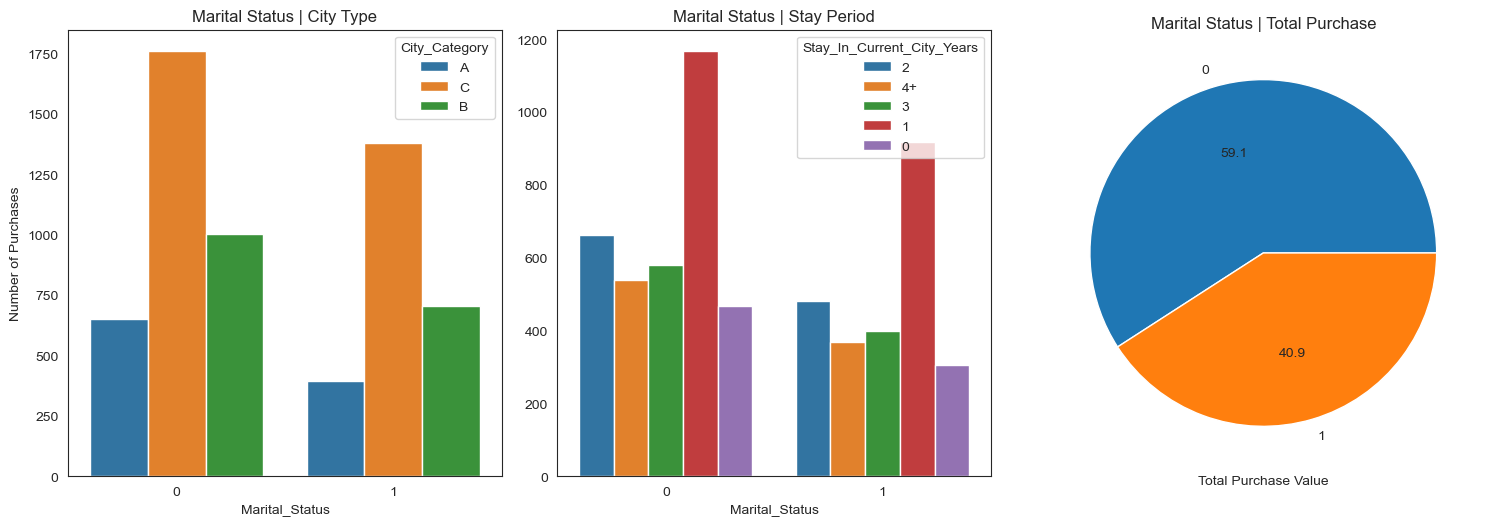

In [24]:
## column Marital Status with City Type, Stay Period, Number of units purchased, and Total purchase value

plt.figure(1,figsize = (15,15))

## Marital Status with City Type

plt.subplot(331)
sns.countplot(data = df_user, hue = "City_Category", x = "Marital_Status")
plt.ylabel("Number of Purchases")
plt.title("Marital Status | City Type")

## Marital Status with Stay Period

plt.subplot(332)
sns.countplot(data = df_user, hue = "Stay_In_Current_City_Years", x = "Marital_Status")
plt.ylabel("")
plt.title("Marital Status | Stay Period")

## Marital Status with Total Purchase Value

plt.subplot(333)
df_user.groupby("Marital_Status")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Marital Status | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

###### Observation:
There is no anomaly found in this data from our previous findings.

##### City Category & Stay Years in Current City

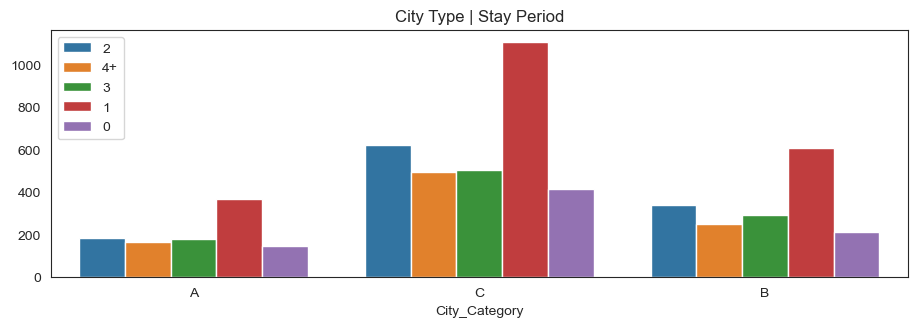

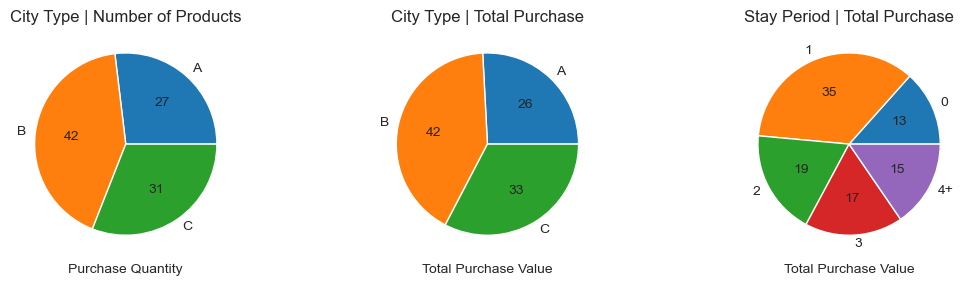

In [25]:
## column City Type with Stay Period, and Total purchase value

plt.figure(1,figsize = (18,6))

## City Type with Stay Period

plt.subplot(221)
sns.countplot(data = df_user, hue = "Stay_In_Current_City_Years", x = "City_Category")
plt.legend(loc = "upper left")
plt.ylabel("")
plt.title("City Type | Stay Period")
plt.tight_layout()
plt.show()

plt.figure(2,figsize = (11,8))

## City Type with Number of Units Sold

plt.subplot(331)
df_user.groupby("City_Category")["Num_Products"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("City Type | Number of Products")
plt.xlabel("Purchase Quantity")
plt.ylabel("")

## City Type with Number of Units Sold

plt.subplot(332)
df_user.groupby("City_Category")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("City Type | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

## Stay Period with Total Purchase Value

plt.subplot(333)
df_user.groupby("Stay_In_Current_City_Years")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Stay Period | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")


plt.tight_layout()
plt.show()

###### Observations:
1. There is no anomaly in city type or stay period with years of stay impacted on Black Friday sales.
2. Although the ratio of City Type : Number of Units of Purchased stays the same, the ratio in Type 'A' and 'C' has changed which indicates us that average order value in city 'C' is more than in city 'A'.

In [26]:
## mean consuming by gender for each city group

pd.pivot_table(data=df_user, index='Age', values='Total_Purchase', columns=['City_Category'], aggfunc='mean', margins=True,
               margins_name='Mean_Value').style.background_gradient(cmap='Set3',axis=None, vmin=7999, vmax=9999)

City_Category,A,B,C,Mean_Value
Age,,,,
0-17,866288.760000,950275.640000,443972.062937,608527.550459
18-25,1122289.663551,1163694.957704,527321.108779,843469.859682
26-35,1405051.349241,1266533.665644,559830.302128,974061.912323
36-45,1342992.017045,1272987.355224,530232.021341,866023.620394
46-50,1181536.509434,1267206.054795,499351.518072,778565.391714
51-55,853072.910448,1213214.051852,505263.706093,752408.224532
55+,611612.306122,857036.275862,445048.056604,531222.693548
Mean_Value,1239874.446890,1220522.326889,522003.175852,851751.549482


###### Observation:
The average product value purchased in city type 'A' is 1239874.45, for city type 'B' is 1220522.33, and for city type 'C' is 851751.55.

In [27]:
df_user.describe()

,User_ID,Occupation,Marital_Status,Total_Purchase,Num_Products
count,5.891000e+03,5891.000000,5891.000000,5.891000e+03,5891.000000
mean,1.003025e+06,8.153285,0.419963,8.517515e+05,91.253947
std,1.743379e+03,6.323140,0.493594,9.329978e+05,105.929800
min,1.000001e+06,0.000000,0.000000,4.410800e+04,5.000000
25%,1.001518e+06,3.000000,0.000000,2.349140e+05,25.000000
50%,1.003026e+06,7.000000,0.000000,5.126120e+05,53.000000
75%,1.004532e+06,14.000000,1.000000,1.099005e+06,114.000000
max,1.006040e+06,20.000000,1.000000,1.053678e+07,1025.000000


### Multivariate Analysis

In [28]:
## creating a new column

temp_lst = []
for i in range(len(df_user)):
    temp_lst.append(df_user['Gender'][i]+"_"+str(df_user["Marital_Status"][i]))
df_user.insert(9,"Gen_Stat",temp_lst)
df_user.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase,Num_Products,Gen_Stat
0,1000001,F,0-17,10,A,2,0,333481,34,F_0
1,1000002,M,55+,16,C,4+,0,810353,76,M_0
2,1000003,M,26-35,15,A,3,0,341635,29,M_0
3,1000004,M,46-50,7,B,2,1,205987,13,M_1
4,1000005,M,26-35,20,A,1,1,821001,106,M_1


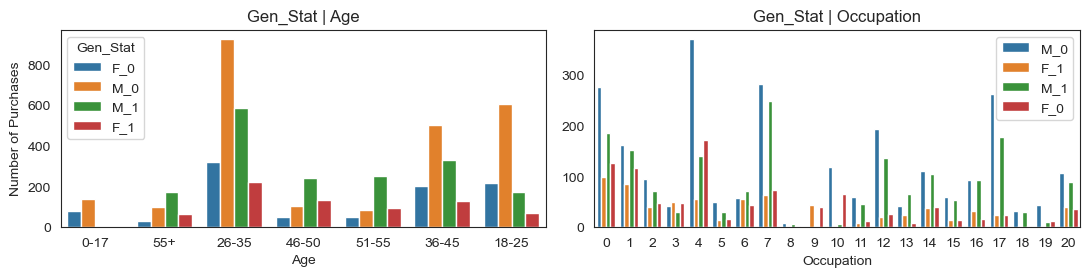

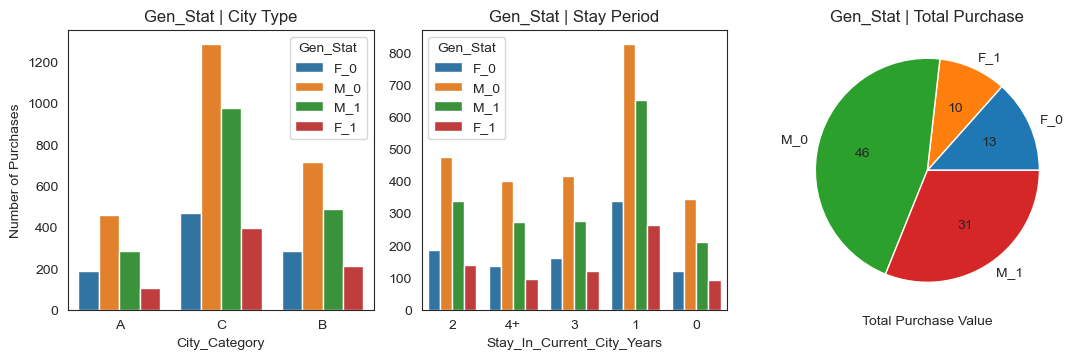

In [29]:
## Biffurcating on basis of Gender and Marital Status in one column

plt.figure(1,figsize = (11,5))

## Gen_Stat with Age

plt.subplot(221)
sns.countplot(data = df_user, x = "Age", hue = "Gen_Stat")
plt.title("Gen_Stat | Age")
plt.ylabel("Number of Purchases")

## Gen_Stat with Occupation

plt.subplot(222)
sns.countplot(data = df_user, x = "Occupation", hue = "Gen_Stat")
plt.legend(loc = 'upper right')
plt.ylabel("")
plt.title("Gen_Stat | Occupation")

plt.tight_layout()
plt.show()

plt.figure(2,figsize = (11,10))

## Gen_Stat with City Type

plt.subplot(331)
sns.countplot(data = df_user, x = "City_Category", hue = "Gen_Stat")
plt.ylabel("Number of Purchases")
plt.title("Gen_Stat | City Type")

## Gen_Stat with Stay Period

plt.subplot(332)
sns.countplot(data = df_user, x = "Stay_In_Current_City_Years", hue = "Gen_Stat")
plt.ylabel("")
plt.title("Gen_Stat | Stay Period")

## Gender with Total Purchase Value

plt.subplot(333)
df_user.groupby("Gen_Stat")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Gen_Stat | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

###### Observations:
1. Unmarried males from age category '26-35' purchased the most number of items, followed by unmarried males of age category '18-25', followed by married males of age category '26-35', followed by unmarried males of age category '36-45', and finally the 5th most buying is unmarried women from age category '26-35'.
2. Unmarried males in occupation category '4' has made more number of purchases, followed by unmarried men in occupation category '7', followed by unmarried men in occupation category '0', followed by unmarried men in occupation category '17', and finally  followed by married men in occupation category '7'.
3. Unmarried males have contributed to almost 46% of the total revenue on Black Friday, followed by married male with 31% and then unmarried females with 13% and married females with 10%.

### Correlation

In [30]:
df.corr(numeric_only = True)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.003723,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,0.001022,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.016296,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.297127,-0.314125
Product_Category_2,0.003723,0.001022,0.016296,0.297127,1.000000,-0.130762
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.130762,1.000000


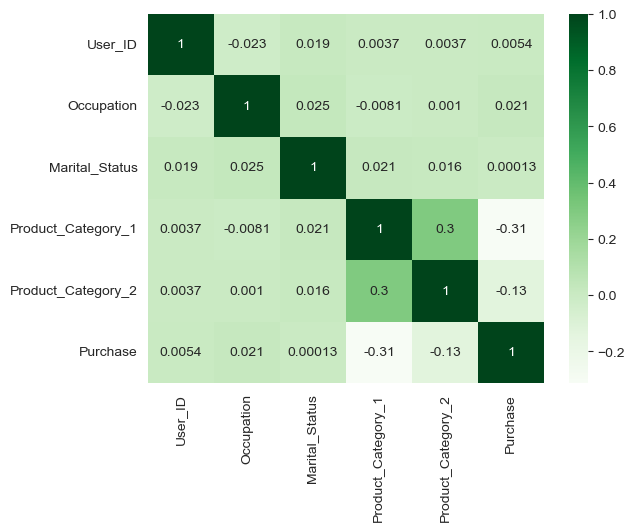

In [31]:
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

In [32]:
df_user.corr(numeric_only = True)

,User_ID,Occupation,Marital_Status,Total_Purchase,Num_Products
User_ID,1.000000,-0.019323,0.002596,-0.014669,-0.016279
Occupation,-0.019323,1.000000,0.032028,0.000419,-0.009617
Marital_Status,0.002596,0.032028,1.000000,-0.020592,-0.019490
Total_Purchase,-0.014669,0.000419,-0.020592,1.000000,0.978977
Num_Products,-0.016279,-0.009617,-0.019490,0.978977,1.000000


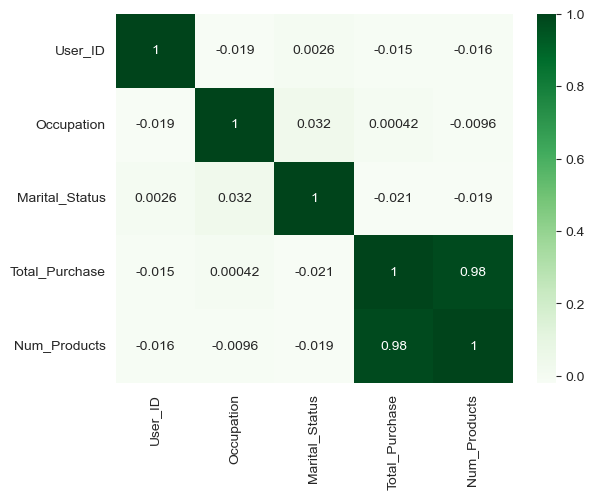

In [33]:
sns.heatmap(df_user.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

In conclusion,
